In [303]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the Dataset

In [266]:
data=sns.load_dataset("titanic")

Exploring the Data

In [267]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [268]:
data.shape

(891, 15)

In [269]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning

In [270]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [271]:
data["age"].fillna(data["age"].mean(),inplace=True)
data.drop(columns="deck",inplace=True)
data.dropna(inplace=True)

In [272]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Data Visualization

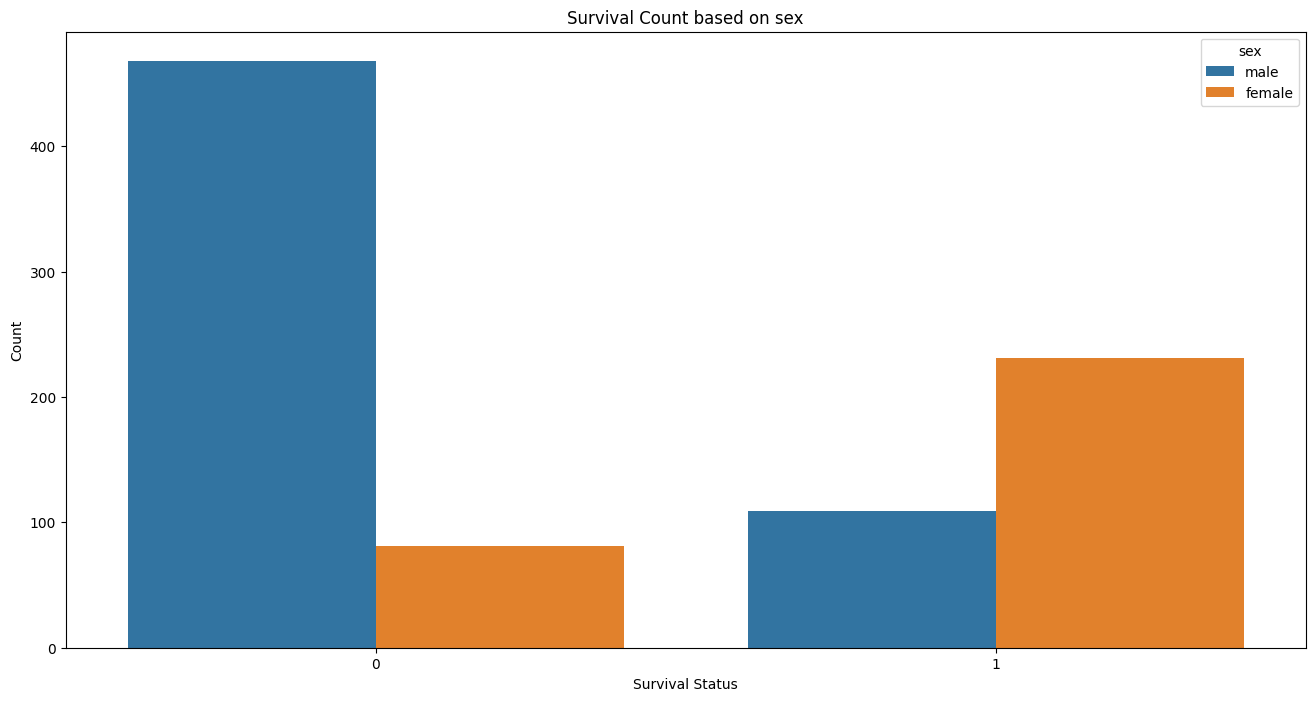

In [278]:
plt.figure(figsize=(16,8))
sns.countplot(x='survived', data=data,hue="sex")
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count based on sex')
plt.show()

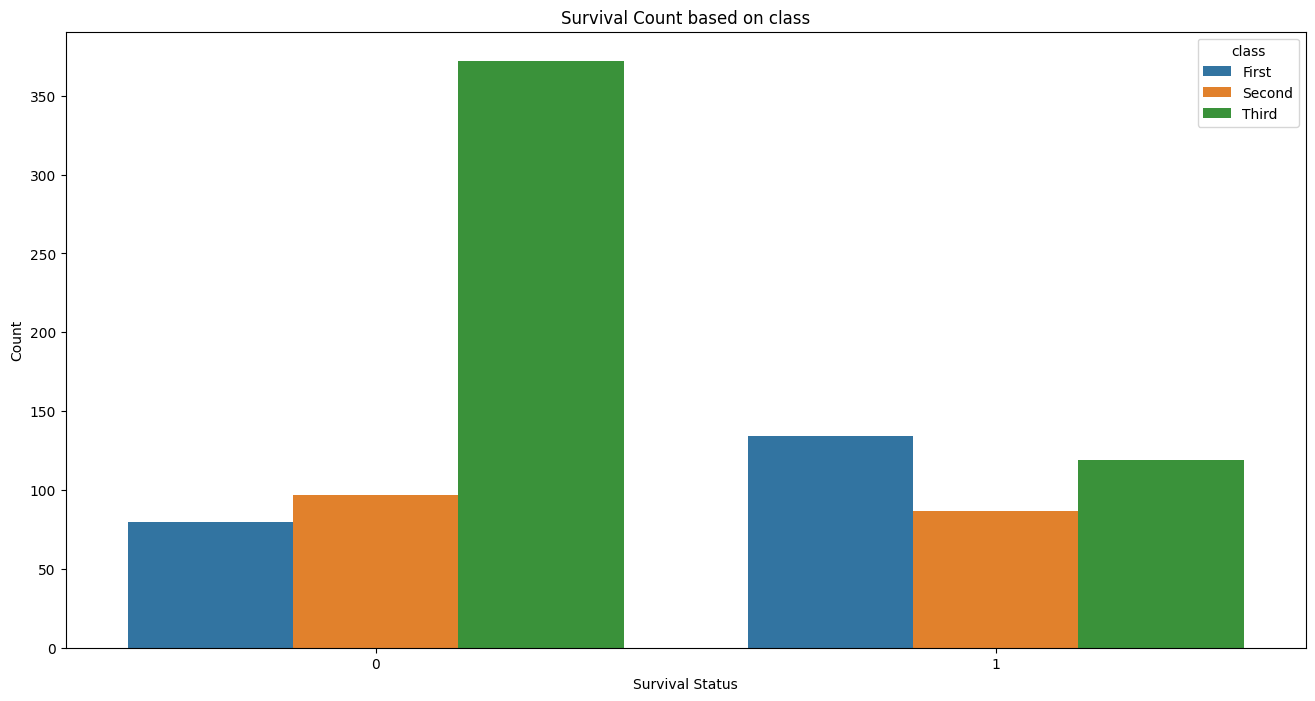

In [277]:
plt.figure(figsize=(16,8))
sns.countplot(x='survived', data=data,hue="class")
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count based on class')
plt.show()

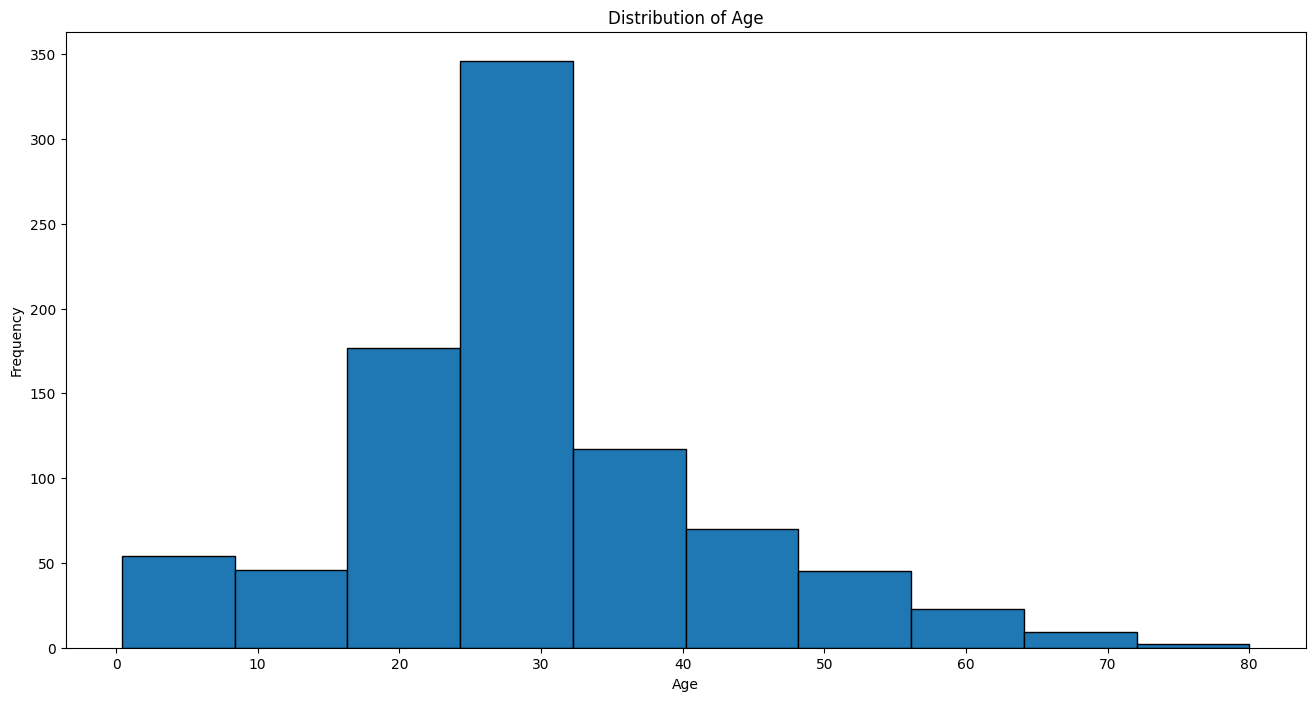

In [280]:
plt.figure(figsize=(16,8))
plt.hist(data['age'], bins=10, edgecolor="black")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

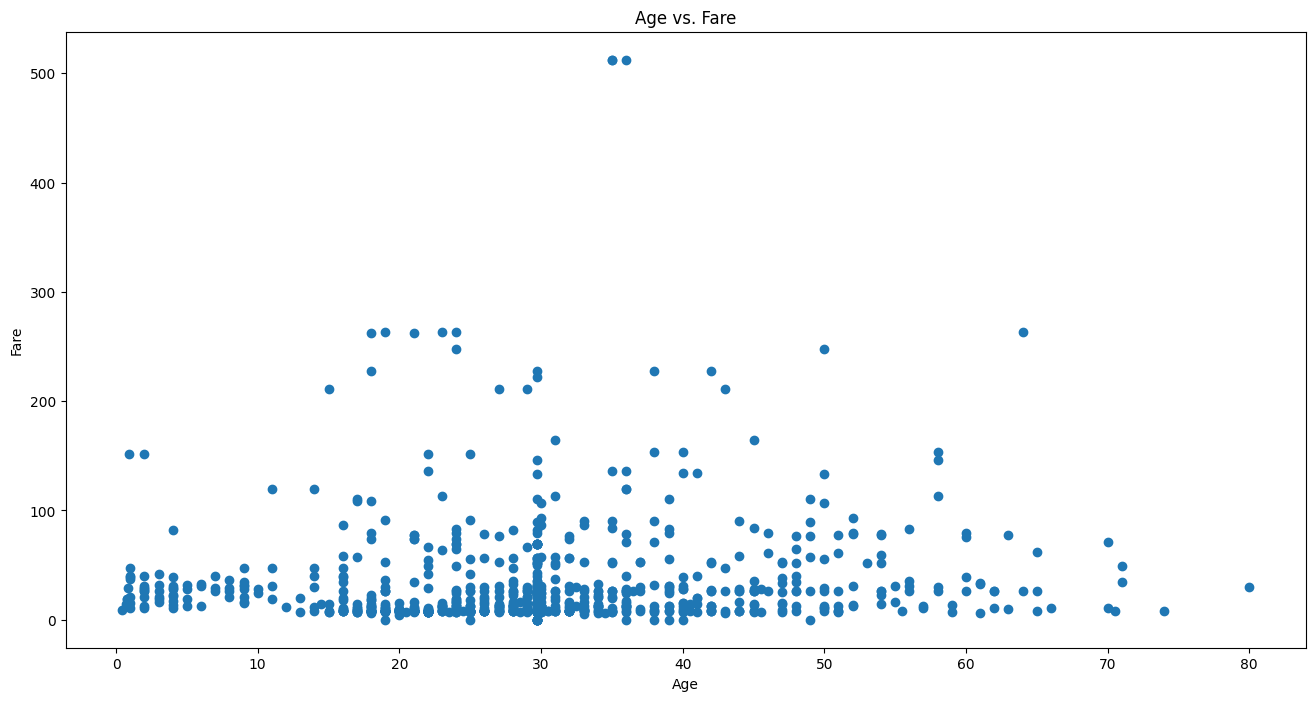

In [259]:
plt.figure(figsize=(16,8))
plt.scatter(data['age'], data['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

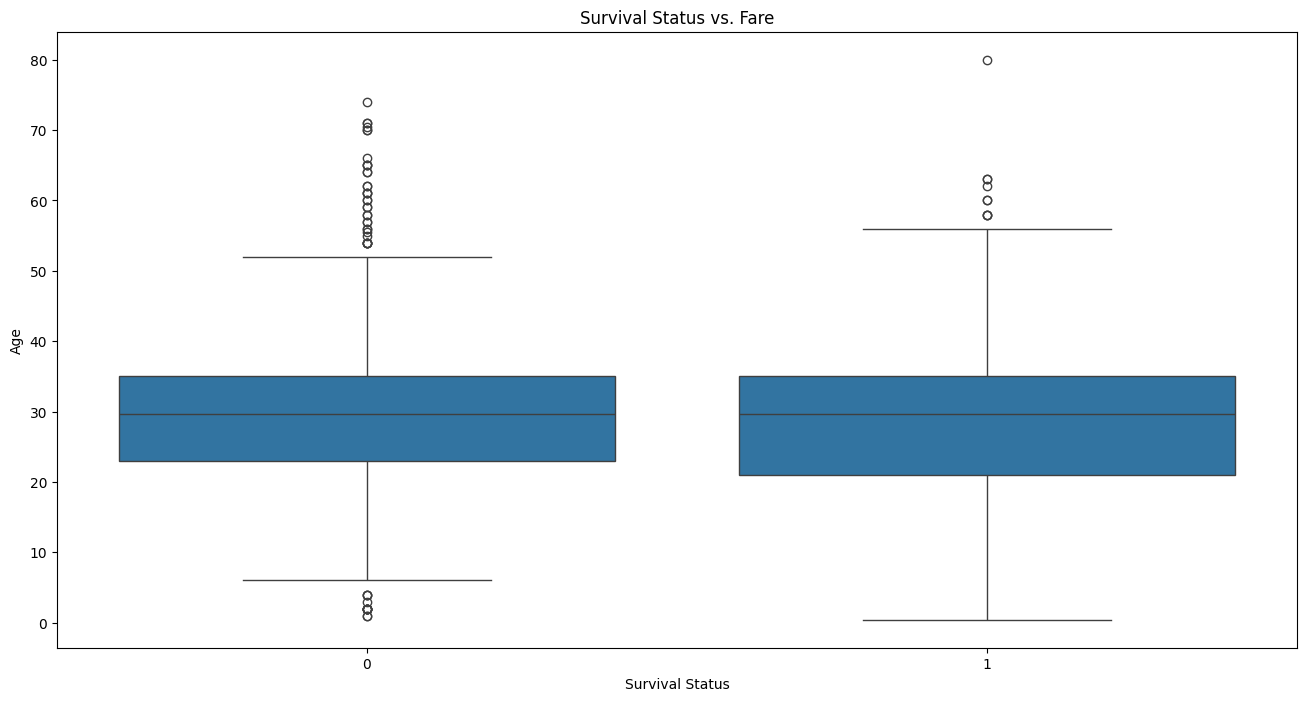

In [286]:
plt.figure(figsize=(16,8))
sns.boxplot(x=data['survived'], y=data['age'])
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Survival Status vs. Fare')
plt.show()

Converting categorical data into numerical data

In [294]:
ord_data=[["First","Second","Third"]]
ord_data1=[["C","S","Q"]]
ord_data2=[["female","male"]]
oe=OrdinalEncoder(categories=ord_data)
data["class"]=oe.fit_transform(data[["class"]])
oe=OrdinalEncoder(categories=ord_data1)
data["embarked"]=oe.fit_transform(data[["embarked"]])
oe=OrdinalEncoder(categories=ord_data2)
data["sex"]=oe.fit_transform(data[["sex"]])

In [295]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1.0,22.0,1,0,7.2500,1.0,2.0,man,True,Southampton,no,False
1,1,1,0.0,38.0,1,0,71.2833,0.0,0.0,woman,False,Cherbourg,yes,False
2,1,3,0.0,26.0,0,0,7.9250,1.0,2.0,woman,False,Southampton,yes,True


Splitting data into input and output

In [296]:
x=data.iloc[:,1:9]
y=data["survived"]

Dividing data into trainig and testing data

In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Feature Scaling

In [298]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training (Random Forest Classifier)

In [299]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the model

In [300]:
y_pred = rfc.predict(x_test)

In [304]:
accuracy_score(y_test, y_pred)

0.7528089887640449

In [305]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.76      0.79       109\n           1       0.66      0.74      0.70        69\n\n    accuracy                           0.75       178\n   macro avg       0.74      0.75      0.74       178\nweighted avg       0.76      0.75      0.75       178\n'

In [306]:
confusion_matrix(y_test, y_pred)

array([[83, 26],
       [18, 51]], dtype=int64)

Visualizing the results

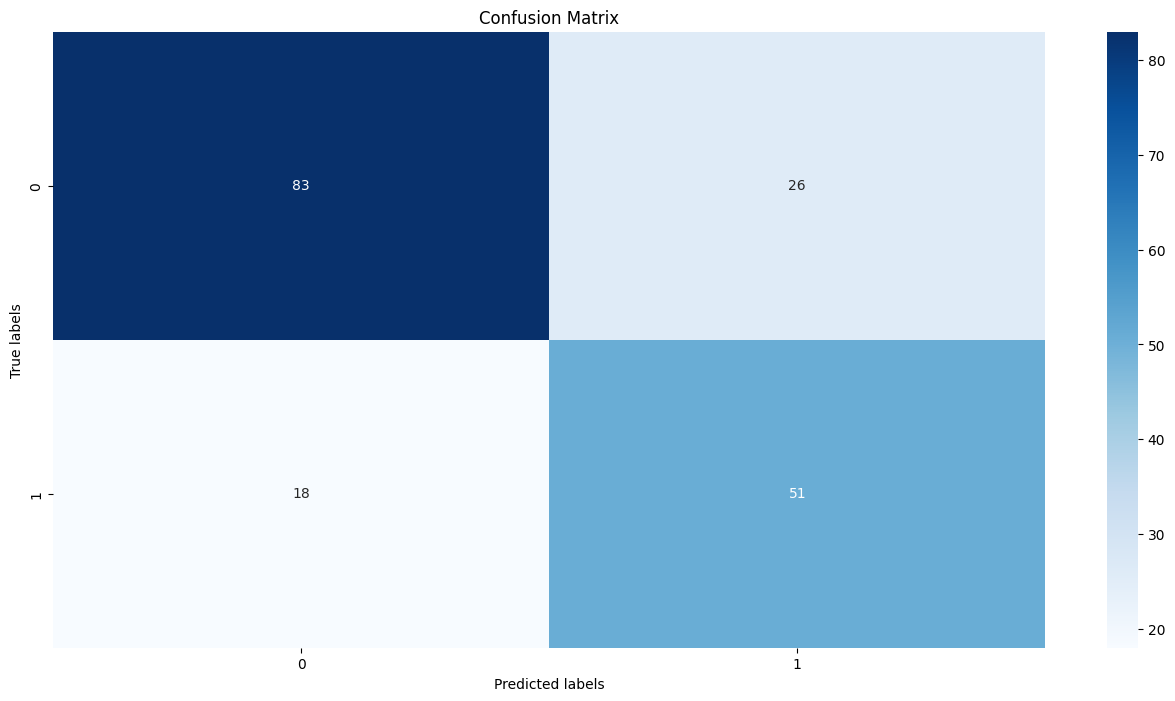

In [308]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()